<h2>Importing Libraries and Building Network</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
df = pd.read_csv('body_reddit.tsv', sep='\t')
df.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08..."
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049..."
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082..."
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0...."
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0...."


In [3]:
g = nx.DiGraph()

for i, row in df.iterrows():
    source = row['SOURCE_SUBREDDIT']
    target = row['TARGET_SUBREDDIT']
    g.add_edge(source, target)

g.number_of_nodes()

35776

<h2>Network Analysis</h2>

In [5]:
print(f"Nodes: {g.number_of_nodes()} Edges: {g.number_of_edges()}")
print(f"Strongly Connected: {nx.is_strongly_connected(g)}")
print(f"Weakly Connected: {nx.is_weakly_connected(g)}")


Nodes: 35776 Edges: 137821
Strongly Connected: False
Weakly Connected: False


In [6]:
sorted_top_in = sorted(g.in_degree(), key=lambda x: x[1], reverse=True)[:5]
sorted_top_out = sorted(g.out_degree(), key = lambda x: x[1], reverse=True)[:5]

print(f"Top In Degree: {sorted_top_in}")
print(f"Top Out Degree: {sorted_top_out}")

Top In Degree: [('askreddit', 2161), ('iama', 1646), ('pics', 953), ('videos', 879), ('todayilearned', 816)]
Top Out Degree: [('subredditdrama', 1350), ('copypasta', 636), ('drama', 600), ('subredditoftheday', 559), ('outoftheloop', 507)]


In [8]:
#Statitstics
degrees = [d for _, d in g.degree()]
print("Mean",np.mean(degrees))
print("Max",np.max(degrees))
print("Min",np.min(degrees))
print("Standard Dev:", np.std(degrees))

Mean 7.704662343470483
Max 2524
Min 1
Standard Dev: 36.951671474700326


In [18]:
in_degree = [deg for _, deg in g.in_degree()]
out_degree = [deg for _, deg in g.out_degree()]

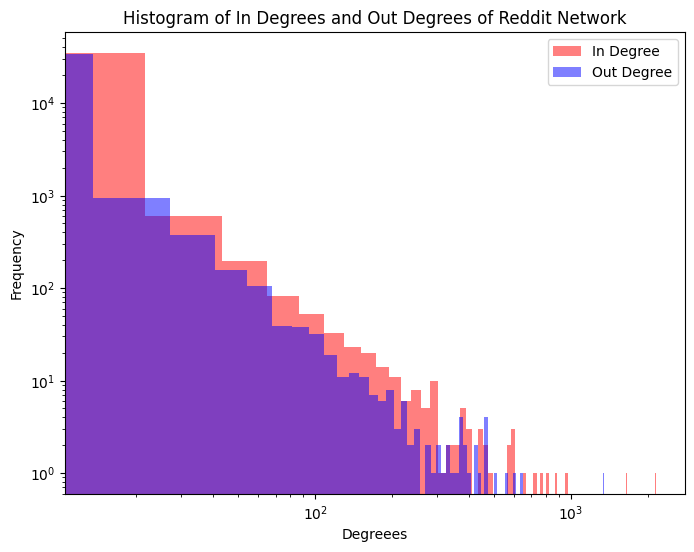

In [26]:
#Histogram of Degrees
plt.figure(figsize=(8,6))
plt.hist(in_degree, bins=100, alpha=0.5, label="In Degree", color="red")
plt.hist(out_degree, bins=100, alpha=0.5, label="Out Degree", color="blue")
plt.xlabel("Degreees")
plt.ylabel("Frequency")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title("Histogram of In Degrees and Out Degrees of Reddit Network")
plt.show()

In [9]:
degree_cent = nx.degree_centrality(g)
top_degree = sorted(degree_cent.items(), key=lambda x: x[1], reverse=True)[:5]

print(f"Top degree: {top_degree}")

Top degree: [('askreddit', 0.07055206149545772), ('iama', 0.056743535988819004), ('subredditdrama', 0.05042627533193571), ('writingprompts', 0.031949685534591196), ('outoftheloop', 0.030719776380153736)]


In [11]:
#betweenness centrality would take WAY too long to analyze so running a few subsets to estimate
betweenness_cent_1 = nx.betweenness_centrality(g, k=1000, seed=10)
betweenness_cent_2 = nx.betweenness_centrality(g, k=1000, seed=20)

top_cent_1 = sorted(betweenness_cent_1.items(), key=lambda x: x[1], reverse=True)[:5]
top_cent_2 = sorted(betweenness_cent_2.items(), key=lambda x: x[1], reverse=True)[:5]

print(f"Between Centrality 1: {top_cent_1}")
print(f"Between Centrality 2: {top_cent_2}")


Between Centrality 1: [('askreddit', 0.052369575934516174), ('subredditdrama', 0.04859890722376449), ('iama', 0.04339681392066428), ('outoftheloop', 0.02933736764444548), ('writingprompts', 0.01755304102260726)]
Between Centrality 2: [('askreddit', 0.05233421950058464), ('subredditdrama', 0.04702729586846618), ('iama', 0.04183333483500194), ('outoftheloop', 0.030722434784438958), ('writingprompts', 0.015115147846616857)]


<h2>Investigating Sentiment Analysis</h2>

<h4>Vader Sentiment Analysis exists in data set. Need to extract first</h4>

In [29]:
#Extracting VADER sentiment calculations
df[['VADER_POS','VADER_NEG','VADER_COMPOUND']]= df['PROPERTIES'].str.split(',', expand=True)[[18,19,20]].astype(float)

In [31]:
df.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES,VADER_POS,VADER_NEG,VADER_COMPOUND
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08...",0.073,0.080,0.1748
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049...",0.472,0.000,0.5538
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082...",0.000,0.000,0.0000
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0....",0.153,0.026,0.9672
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0....",0.139,0.039,0.8906


In [36]:
#saw some 0 for all three sentiment scores. investigating
empty_vader = df[
    (df['VADER_POS']==0.0) & 
    (df['VADER_NEG']==0.0) & 
    (df['VADER_COMPOUND']==0.0)].copy()

empty_vader.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES,VADER_POS,VADER_NEG,VADER_COMPOUND
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082...",0.0,0.0,0.0
6,locationbot,legaladvice,1u4wfes,2014-01-07 20:17:41,1,"184.0,172.0,0.744565217391,0.0326086956522,0.0...",0.0,0.0,0.0
15,gaming4gamers,fallout,1u5q84s,2014-01-01 06:55:04,1,"102.0,102.0,0.803921568627,0.0294117647059,0.0...",0.0,0.0,0.0
21,fl_vapers,vaperequests,1u5uchs,2014-01-03 07:21:14,1,"218.0,197.0,0.756880733945,0.0137614678899,0.0...",0.0,0.0,0.0
22,jailbreak,flextweak,1u5vxys,2014-01-01 08:33:33,1,"115.0,110.0,0.713043478261,0.0173913043478,0.0...",0.0,0.0,0.0


In [43]:
len(empty_vader)

41991

In [44]:
#42 thousand entries need to be cleaned up
df_cleaned = df.drop(empty_vader.index)

df_cleaned.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES,VADER_POS,VADER_NEG,VADER_COMPOUND
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08...",0.073,0.080,0.1748
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049...",0.472,0.000,0.5538
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0....",0.153,0.026,0.9672
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0....",0.139,0.039,0.8906
5,dogemarket,dogecoin,1u4w7bs,2013-12-31 18:35:44,1,"1328.0,1110.0,0.768825301205,0.0143072289157,0...",0.100,0.008,0.9323


<h2>Classification of Subreddits</h2>

<h5>Looking to see if certain subreddits could be viewed as positive, negative, or neutral based on the sentiment scores and connections to other subreddits.</h5>

In [45]:
#New Dataframe aggregating by subreddit (in is seperate from out)
out_sentiment = df_cleaned.groupby('SOURCE_SUBREDDIT')[['VADER_POS', 'VADER_NEG','VADER_COMPOUND']].mean()
out_sentiment.head()

,VADER_POS,VADER_NEG,VADER_COMPOUND
SOURCE_SUBREDDIT,,,
07scape,0.11950,0.07800,0.98430
0magick,0.07400,0.05100,0.67420
0x10c,0.15675,0.00825,0.61490
1000wordstories,0.05400,0.05500,-0.27320
100daysofketo,0.14820,0.06210,0.72348


In [46]:
in_sentiment = df_cleaned.groupby('TARGET_SUBREDDIT')[['VADER_POS', 'VADER_NEG','VADER_COMPOUND']].mean()
in_sentiment.head()

,VADER_POS,VADER_NEG,VADER_COMPOUND
TARGET_SUBREDDIT,,,
01001111010100000,0.080000,0.060,0.900600
0131,0.123000,0.031,0.818700
07scape,0.138667,0.063,0.692067
0bservat0ry,0.049000,0.024,0.088550
0magick,0.095000,0.067,0.296000


In [48]:
#instead of working with two seperate dataframes I want to have them all in one
#first changing column names then combining into one dataframe
out_sentiment.columns=['OUT_VADER_POS','OUT_VADER_NEG','OUT_VADER_COMPOUND']
in_sentiment.columns=['IN_VADER_POS', 'IN_VADER_NEG','IN_VADER_COMPOUND']

df_subreddits = out_sentiment.join(in_sentiment, how='outer').dropna()

df_subreddits.head()

,OUT_VADER_POS,OUT_VADER_NEG,OUT_VADER_COMPOUND,IN_VADER_POS,IN_VADER_NEG,IN_VADER_COMPOUND
07scape,0.119500,0.078000,0.984300,0.138667,0.063,0.692067
0magick,0.074000,0.051000,0.674200,0.095000,0.067,0.296000
0x10c,0.156750,0.008250,0.614900,0.144000,0.000,0.636000
100daysofketo,0.148200,0.062100,0.723480,0.142250,0.020,0.603975
100movies365days,0.061667,0.038972,0.189528,0.097000,0.096,-0.092800


In [49]:
#Making a basic classification. Might change later based on analysis
def classify_sent(compound):
    if compound>0.1:
        return 'positive'
    elif compound<-0.1:
        return 'negative'
    else:
        return 'neutral'

df_subreddits['OUT_LABEL'] = df_subreddits['OUT_VADER_COMPOUND'].apply(classify_sent)
df_subreddits['IN_LABEL'] = df_subreddits['IN_VADER_COMPOUND'].apply(classify_sent)

df_subreddits.head()

,OUT_VADER_POS,OUT_VADER_NEG,OUT_VADER_COMPOUND,IN_VADER_POS,IN_VADER_NEG,IN_VADER_COMPOUND,OUT_LABEL,IN_LABEL
07scape,0.119500,0.078000,0.984300,0.138667,0.063,0.692067,positive,positive
0magick,0.074000,0.051000,0.674200,0.095000,0.067,0.296000,positive,positive
0x10c,0.156750,0.008250,0.614900,0.144000,0.000,0.636000,positive,positive
100daysofketo,0.148200,0.062100,0.723480,0.142250,0.020,0.603975,positive,positive
100movies365days,0.061667,0.038972,0.189528,0.097000,0.096,-0.092800,positive,neutral


In [51]:
#looking at totals of labels
df_subreddits['OUT_LABEL'].value_counts()

OUT_LABEL
positive    9522
negative    1406
neutral      798
Name: count, dtype: int64

In [52]:
df_subreddits['IN_LABEL'].value_counts()

IN_LABEL
positive    9163
negative    1710
neutral      853
Name: count, dtype: int64

<h2>Community Analysis of Graph</h2>

In [53]:
#using greedy modularity communities begin to look at communities within the larger network
from networkx.algorithms.community import greedy_modularity_communities
communities = list(greedy_modularity_communities(g))
print("Number of communities:",len(communities))
sizes_of_communities = [len(comm) for comm in communities]
print("Sizes of communities:",sizes_of_communities)

Number of communities: 855
Sizes of communities: [10135, 8398, 6135, 1653, 1327, 1086, 859, 601, 396, 331, 290, 274, 245, 243, 233, 192, 160, 128, 101, 88, 72, 66, 62, 52, 47, 42, 42, 41, 39, 35, 32, 28, 27, 23, 23, 21, 20, 20, 19, 17, 16, 15, 14, 13, 12, 12, 12, 12, 11, 11, 10, 10, 9, 9, 9, 9, 9, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

<h5>Seeing the large amount of small networks. Focus shifted to top 5 communities</h5>

In [54]:
#looking to the top 5 largest communities
sorted_communities = sorted(communities, key=len, reverse=True)

#assign these to values for analysis later
top_communities = sorted_communities[:5]

len(top_communities)

5

In [55]:
#turning communities into networkx subgraphs
top_communities_nx = {}
for index, comm in enumerate(top_communities):
    top_communities_nx[index] = g.subgraph(comm).copy()
    print(top_communities_nx[index])


DiGraph with 10135 nodes and 47849 edges
DiGraph with 8398 nodes and 25340 edges
DiGraph with 6135 nodes and 13374 edges
DiGraph with 1653 nodes and 2697 edges
DiGraph with 1327 nodes and 2311 edges


In [56]:
#basic analysis of degrees for each of the top five communities
for i in range(5):
    print("Community",i+1)
    degrees = [d for _, d in top_communities_nx[i].degree()]
    print("Mean",np.mean(degrees))
    print("Max",np.max(degrees))
    print("Min",np.min(degrees))
    print("Standard Deviation:", np.std(degrees))
    print("\n")

Community 1
Mean 9.442328564380858
Max 1556
Min 1
Standard Deviation: 36.75519091644042


Community 2
Mean 6.0347701833769944
Max 626
Min 1
Standard Deviation: 21.117206141576165


Community 3
Mean 4.359902200488998
Max 704
Min 1
Standard Deviation: 17.89896181051476


Community 4
Mean 3.263157894736842
Max 187
Min 1
Standard Deviation: 8.00788050743068


Community 5
Mean 3.4830444611906555
Max 443
Min 1
Standard Deviation: 14.68440592320782




<h2>Visualization of Network</h2>

In [ ]:
#This takes a while...consider only visualizing communities?

import scipy
import community
plt.figure(figsize=(16, 12))

un_g = g.to_undirected()

partition = community.best_partition(un_g)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(un_g, k=0.1, iterations=20)
node_list = list(partition.keys())
node_colors = list(partition.values())
    
nx.draw_networkx_nodes(un_g, pos, node_list, node_size=40, 
                       # the arguments below here make each community a different color
                       vmin=0, vmax=size,
                       node_color=node_colors, cmap=plt.cm.tab20)
    #print(count)
nx.draw_networkx_edges(un_g, pos, alpha=0.5)
plt.show()

<h4>Considering Switching to another Visualization method</h4>